#### Author: Mustafa Radheyyan
#### Date: 04/17/2023
#### Assignment: Cognixia JUMPlus Python Project 3
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# <span style="color:#FFCF69">Requirements</span>

## 1. Import pandas, matplotlib, seaborn, sklearn libraries

Imports and Constants

In [1]:
import numpy as np
import pandas as pd
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

Path of data source

In [2]:
IRIS_CSV_PATH = 'Iris.csv'

Context Manager helper functions for displaying DataFrames differently than the default configuration settings

In [3]:
def force_show_all_columns(df):
    with pd.option_context('display.max_columns', None, 'display.width', None):
        display(df)

In [4]:
def force_show_all_rows(df):
    with pd.option_context('display.max_rows', None, 'display.width', None):
        display(df)

In [5]:
def force_show_max_width(df):
    with pd.option_context('display.max_colwidth', None, 'display.width', None):
        display(df)

## 2. Read csv file named as iris.csv

I read the CSV with the 'Id' column as the index column because it is unique

In [6]:
iris_df = pd.read_csv(IRIS_CSV_PATH)
column_to_check = 'Id'

print(f"The number of unique {{{column_to_check.lower()}}} is: {len(iris_df[column_to_check].unique())}, compared to the number of rows total: {len(iris_df)}")
marvel_duplicate = iris_df[iris_df.duplicated(subset=[column_to_check], keep=False)]

iris_df = pd.read_csv(IRIS_CSV_PATH, index_col=column_to_check)
iris_df = iris_df.reset_index().drop_duplicates(subset=[column_to_check]).set_index(column_to_check)

iris_df = pd.read_csv(IRIS_CSV_PATH, index_col=column_to_check)

The number of unique {id} is: 150, compared to the number of rows total: 150


## Data Cleaning

##### Get DF Column List and Id Column (Index)

Made DataFrame's columns snake case in order to be more computing friendly<br></br>
Made a list of the dataframe's columns to enable easier searching of column names

In [7]:
pascal_to_camel_regex = r'(?<!^)(?=[A-Z])'

In [8]:
iris_df.columns = iris_df.columns.str.replace(pascal_to_camel_regex, '_', regex=True).str.lower()
iris_df.index.name = iris_df.index.name.lower()
iris_columns = list(iris_df.reset_index().columns)
iris_columns

['id',
 'sepal_length_cm',
 'sepal_width_cm',
 'petal_length_cm',
 'petal_width_cm',
 'species']

Set the id column into a variable

In [9]:
columns_with_id_string = [column for column in iris_columns if "id" in column]
print(columns_with_id_string)
id_column = columns_with_id_string[0]

['id', 'sepal_width_cm', 'petal_width_cm']


## 3. Show first five records

The head function displays 5 rows by default

In [10]:
iris_df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,species
id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


## 4. Show a dataframe which has sepal width greater than 4

In [11]:
force_show_all_rows(iris_df.loc[iris_df['sepal_width_cm'] > 4].sort_values('sepal_width_cm'))

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,species
id,,,,,
33,5.2,4.1,1.5,0.1,Iris-setosa
34,5.5,4.2,1.4,0.2,Iris-setosa
16,5.7,4.4,1.5,0.4,Iris-setosa


## 5. Show a dataframe which has petal width greater than 1

In [12]:
force_show_all_rows(iris_df.loc[iris_df['petal_width_cm'] > 1].sort_values('petal_width_cm'))

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,species
id,,,,,
81,5.5,2.4,3.8,1.1,Iris-versicolor
70,5.6,2.5,3.9,1.1,Iris-versicolor
99,5.1,2.5,3.0,1.1,Iris-versicolor
74,6.1,2.8,4.7,1.2,Iris-versicolor
91,5.5,2.6,4.4,1.2,Iris-versicolor
93,5.8,2.6,4.0,1.2,Iris-versicolor
96,5.7,3.0,4.2,1.2,Iris-versicolor
83,5.8,2.7,3.9,1.2,Iris-versicolor
97,5.7,2.9,4.2,1.3,Iris-versicolor


## 6. Retrieve records which have petal width more than 2

In [13]:
petal_width_gt_2 = iris_df.loc[iris_df['petal_width_cm'] > 2].sort_values('petal_width_cm')

## 7. Figure out the relationship between sepal length and petal length and draw a scatter plot between them and show the relationship between them

In [14]:
iris_df['sepal_length_cm'].corr(iris_df['petal_length_cm'])

0.8717541573048718

Lines 1-5: Use Scikit Learn linear modelling to create a linear regression model best fit of sepal length and petal length<br></br>
Line 6: Get the petal length prediction by using the linear regression object to predict sepal length<br></br>
Line 10: Plot the scatter plot of sepal length and petal length<br></br>
Line 11: Plot the line of best fit using the sepal length and the petal length from the linear regression prediction

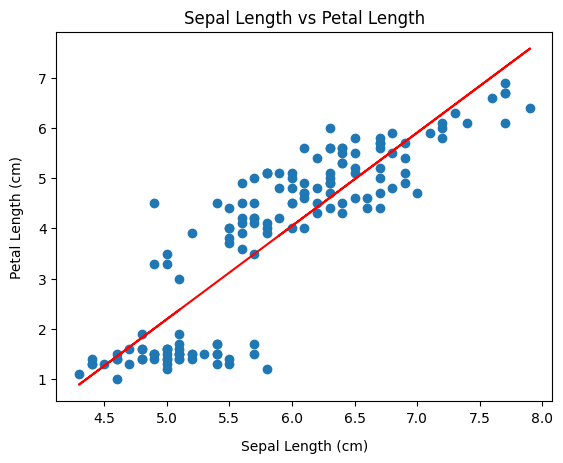

In [15]:
from sklearn.linear_model import LinearRegression
X = iris_df['sepal_length_cm'].values.reshape(-1, 1)  # iloc[:, 1] is the column of X
Y = iris_df['petal_length_cm'].values.reshape(-1, 1)  # df.iloc[:, 4] is the column of Y
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

ax = plt.subplot()

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
ax.set_xlabel('Sepal Length (cm)', labelpad=10)
ax.set_ylabel('Petal Length (cm)', labelpad=10)
ax.set_title('Sepal Length vs Petal Length')
plt.show()

Line 1: Use Seaborn to plot sepal and petal length scatterplot data, along with the linear regression model's line of best fit<br></br>
Line 2: Get the plot axes<br></br>
Line 3: Set title using plot axes object

Text(0.5, 1.0, 'Sepal Length vs Petal Length')

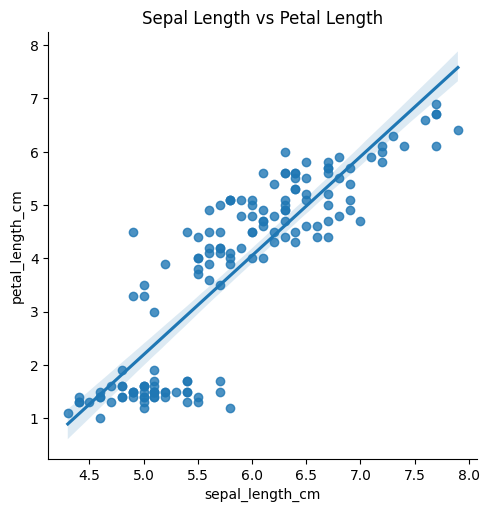

In [16]:
sns.lmplot(x='sepal_length_cm',y='petal_length_cm',data=iris_df,fit_reg=True)
ax = plt.gca()
ax.set_title('Sepal Length vs Petal Length')

## 8. Now apply species as a hue in the same scatter plot for better visibility and understanding

Lines 1-5: Use Scikit Learn linear modelling to create a linear regression model best fit of sepal length and petal length<br></br>
Line 6: Get the petal length prediction by using the linear regression object to predict sepal length<br></br>
Line 8: Get the Matplotlib subplot axes object<br></br>
Line 10: Specify a dictionary of the species and corresponding color map<br></br>
Line 12: Plot the scatter plot of sepal length and petal length, along with the species color map<br></br>
Line 13: Plot the line of best fit using the sepal length and the petal length from the linear regression prediction

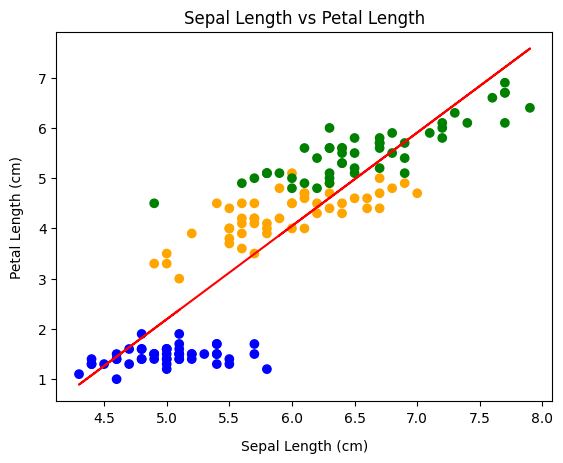

In [17]:
from sklearn.linear_model import LinearRegression
X = iris_df['sepal_length_cm'].values.reshape(-1, 1)  # iloc[:, 1] is the column of X
Y = iris_df['petal_length_cm'].values.reshape(-1, 1)  # df.iloc[:, 4] is the column of Y
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

ax = plt.subplot()

colors = {'Iris-setosa':'blue', 'Iris-versicolor':'orange', 'Iris-virginica':'green'}

plt.scatter(X, Y, c=iris_df['species'].map(colors))
plt.plot(X, Y_pred, color='red')
ax.set_xlabel('Sepal Length (cm)', labelpad=10)
ax.set_ylabel('Petal Length (cm)', labelpad=10)
ax.set_title('Sepal Length vs Petal Length')
plt.show()

Line 1: Use Seaborn to plot color-differentiated and species-independent sepal and petal length scatterplot data, along with plots of the linear regression models' lines of best fit<br></br>
Line 2: Get the plot axes<br></br>
Line 3: Set title using plot axes object

Text(0.5, 1.0, 'Sepal Length vs Petal Length')

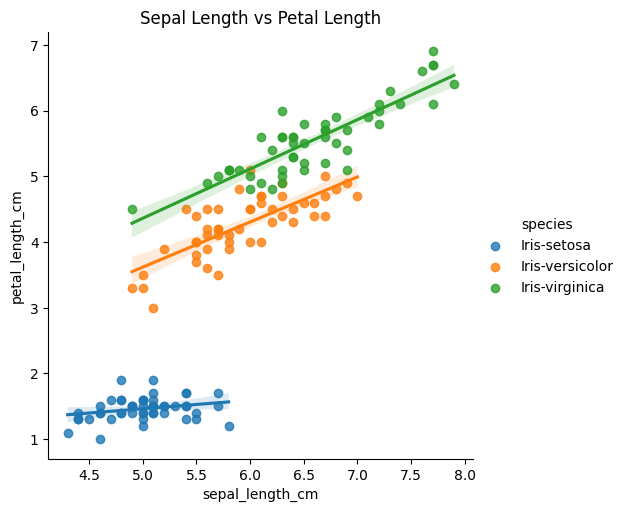

In [18]:
sns.lmplot(x='sepal_length_cm', y='petal_length_cm', data=iris_df, hue='species')
ax = plt.gca()
ax.set_title('Sepal Length vs Petal Length')

# <span style="color:#FFCF69">Applying Linear Regression</span>

## 1. <span style="text-decoration:underline">Model 1</span>:

### a. Create an object named as y which is storing the dataframe of a dependent variable names as 'sepal_length_cm'

In [19]:
y = iris_df[['sepal_length_cm']]
y

,sepal_length_cm
id,
1,5.1
2,4.9
3,4.7
4,4.6
5,5.0
...,...
146,6.7
147,6.3
148,6.5


### b. Create an object named as x which is storing the dataframe of an independent variable names as 'sepal_width_cm'

In [20]:
x = iris_df[['sepal_width_cm']]
x

,sepal_width_cm
id,
1,3.5
2,3.0
3,3.2
4,3.1
5,3.6
...,...
146,3.0
147,2.5
148,3.0


### c. Divide the variables into x_train, x_test, y_train, y_test variables using train_test_split method carrying parameters named as x, y and test size should be 30%

In [21]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.30)

### d. Show first five records of all four variables / objects

In [22]:
print(x_train.head(), '\n\n', x_test.head(), '\n', y_train.head(), '\n', y_test.head())

     sepal_width_cm
id                 
71              3.2
80              2.6
60              2.7
102             2.7
92              3.0 

      sepal_width_cm
id                 
126             3.2
8               3.4
147             2.5
42              2.3
27              3.4 
      sepal_length_cm
id                  
71               5.9
80               5.7
60               5.2
102              5.8
92               6.1 
      sepal_length_cm
id                  
126              7.2
8                5.0
147              6.3
42               4.5
27               5.0


### e. Create an object named as lr and assign memory from linearregression() method.

In [23]:
lr = sklearn.linear_model.LinearRegression()

### f. Fit both training set into fit method

In [24]:
reg = lr.fit(x_train, y_train)

In [25]:
reg.score(x, y)

0.0019579573540202677

In [26]:
reg.score(x_train, y_train)

0.04143547426821326

### g. Predict x_test from predict method and store the result into y_pred object

In [27]:
y_pred = reg.predict(x_test)
y_pred

array([[5.75525146],
       [5.6782352 ],
       [6.02480834],
       [6.10182459],
       [5.6782352 ],
       [6.06331647],
       [5.83226771],
       [5.90928396],
       [5.5242027 ],
       [5.5242027 ],
       [5.83226771],
       [5.90928396],
       [5.79375958],
       [5.94779209],
       [5.75525146],
       [5.83226771],
       [5.94779209],
       [5.79375958],
       [6.02480834],
       [5.83226771],
       [5.83226771],
       [5.83226771],
       [5.87077584],
       [5.44718645],
       [6.06331647],
       [5.98630021],
       [5.83226771],
       [5.83226771],
       [5.48569457],
       [5.6782352 ],
       [5.79375958],
       [5.83226771],
       [5.6782352 ],
       [5.6782352 ],
       [6.14033272],
       [6.02480834],
       [5.75525146],
       [5.5242027 ],
       [6.10182459],
       [6.06331647],
       [5.83226771],
       [5.90928396],
       [5.5242027 ],
       [5.90928396],
       [5.83226771]])

### h. Show first five records from actual and predicted objects

In [28]:
predicted_object = pd.DataFrame(np.round(y_pred, 1), index=range(1, len(y_pred) + 1)).head()
predicted_object = predicted_object.rename(columns={0: 'sepal_length_cm'})

print(y.head(), '\n\n', predicted_object)

    sepal_length_cm
id                 
1               5.1
2               4.9
3               4.7
4               4.6
5               5.0 

    sepal_length_cm
1              5.8
2              5.7
3              6.0
4              6.1
5              5.7


### i. Try to find out mean_squared_error in prediction using method after passing parameter as y_test and y_pred, mind the result

In [29]:
mse_model1 = sklearn.metrics.mean_squared_error(y_test, y_pred)

## 2. <span style="text-decoration:underline">Model 2</span>:

### a. Create an object named as y and store dataframe of sepal_length_cm dependent variable

In [30]:
y = iris_df[['sepal_length_cm']]
y

,sepal_length_cm
id,
1,5.1
2,4.9
3,4.7
4,4.6
5,5.0
...,...
146,6.7
147,6.3
148,6.5


### b. Store 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm' dataframe in x as an independent variables

In [31]:
x = iris_df[['sepal_width_cm', 'petal_length_cm', 'petal_width_cm']]
x

,sepal_width_cm,petal_length_cm,petal_width_cm
id,,,
1,3.5,1.4,0.2
2,3.0,1.4,0.2
3,3.2,1.3,0.2
4,3.1,1.5,0.2
5,3.6,1.4,0.2
...,...,...,...
146,3.0,5.2,2.3
147,2.5,5.0,1.9
148,3.0,5.2,2.0


### c. Do train_test_split like you did in model 1 this time test_size is again 30%

In [32]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.30)

### d. Fit both train set into fit method of linearregression

In [33]:
lr = sklearn.linear_model.LinearRegression()
reg = lr.fit(x_train, y_train)

### e. Predict x_test and store result into y_pred using predict method

In [34]:
y_pred = reg.predict(x_test)
y_pred

array([[5.01410954],
       [6.05982413],
       [5.53588283],
       [5.41486225],
       [5.47180297],
       [4.61066565],
       [4.9758957 ],
       [4.85060144],
       [6.23199186],
       [6.23585434],
       [4.68305626],
       [6.86226393],
       [6.20074288],
       [6.67909427],
       [6.06058422],
       [6.61226091],
       [4.97899808],
       [4.60680318],
       [5.14344087],
       [5.2727722 ],
       [5.4225872 ],
       [5.08263768],
       [6.41270666],
       [6.73972287],
       [4.67533132],
       [7.20818161],
       [7.15803116],
       [6.38391254],
       [4.633255  ],
       [6.70940857],
       [5.13554133],
       [6.26540855],
       [6.46016563],
       [5.66176289],
       [6.21326499],
       [7.07422771],
       [5.37547711],
       [4.99462257],
       [5.14326628],
       [5.56660834],
       [5.0787752 ],
       [7.10219972],
       [6.65246785],
       [5.75674286],
       [7.69946601]])

### f. Find out mean_squared_error of actual and predicted test set

In [35]:
mse_model2 = sklearn.metrics.mean_squared_error(y_test, y_pred)

### g. Describe which model is better and why?

In [36]:
from IPython.display import display, HTML

display_model1 = "<span style=color:turquoise>1</span>"
display_model2 = "<span style=color:orange>2</span>"
display_mse_model1 = f"<span style='color:green'>{'%.2f' % round(mse_model1, 2)}</span>"
display_mse_model2 = f"<span style='color:green'>{'%.2f' % round(mse_model2, 2)}</span>"

display(HTML(f"<h2>MSE of Model {display_model1}: {display_mse_model1}<br></br>MSE of Model {display_model2}: {display_mse_model2}</h2>"))
display(HTML(f"<h1>Model {display_model1 if mse_model1 < mse_model2 else display_model2} is better than model {display_model2 if mse_model1 < mse_model2 else display_model1} because {display_mse_model1 if mse_model1 < mse_model2 else display_mse_model2} is closer to 0.0 than {display_mse_model2 if mse_model1 < mse_model2 else display_mse_model1} is.</h1>"))